## Lesson 2.2: Guided Practice

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

First, let's import our data. We'll be using *Iris* again for this exercise. 

In [3]:
!pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-07/2.2-lesson/code/starter-code


In [4]:
iris = pd.read_csv('../../assets/datasets/iris.csv')

In [5]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

As in 2.1, let's split the set into two parts. "X" will be the data and "Y" will be the class labels.

In [6]:
features = iris.iloc[:,0:4]

In [7]:
X = iris.ix[:,0:4].values
y = iris.ix[:,4].values

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

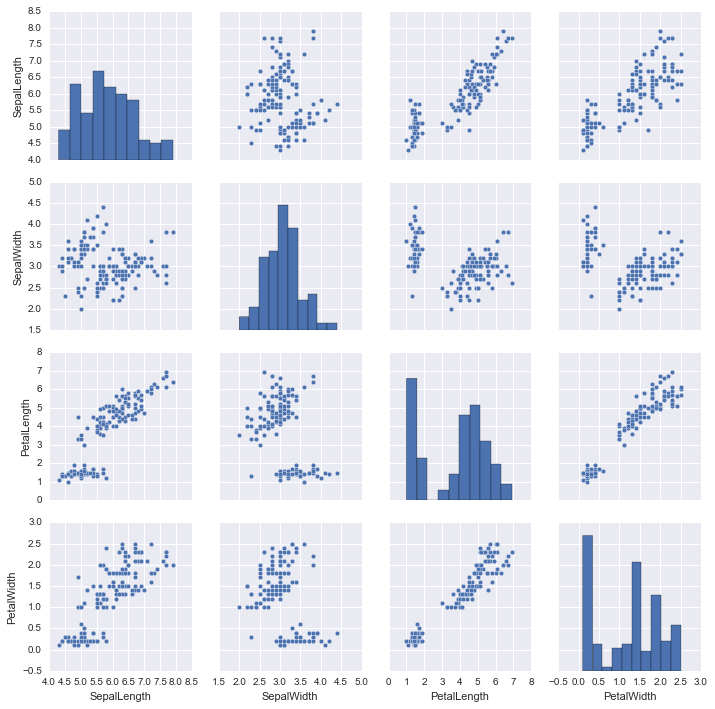

In [8]:
import seaborn as sns
sns.pairplot(iris)

## Step 3: Covariance Matrix

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [9]:
x = iris.ix[:,0:4].values
y = iris.ix[:,4].values
xStandardized = pd.DataFrame(StandardScaler().fit_transform(x))

In [10]:
xStandardized

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


Now, let's set up our data for decomposition by creating a covariance matrix

In [11]:
cov_mat = np.cov(xStandardized.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Decompose the the covariance matrix to find the eigenvalues

## Step 4. Eigenvalues and Eigenvectors

In [12]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [13]:
print eigenValues

[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [14]:
print eigenVectors

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


**Question**: What is the relationship between these eigenvectors/values and the covariance matrix? 

Calculate the Eigen Pairs using the method we just learned

In [15]:
eigenValues, eigenVectors

(array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Now, sort the eigenpairs from highest to lowest

In [16]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

In [17]:
eigenPairs

[(2.930353775589317,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92740362151734101,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163989,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995596078,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [18]:
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print (i[0])

2.93035377559
0.927403621517
0.148342226482
0.0207460139956


## Explained Variance

In [19]:
eigenValSum = sum(eigenValues)


In [20]:
eigenValSum

4.0268456375838939

Now, calculate the explained variance and the Cumulative explained variance

In [21]:
varianceExplained = [(i / eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]
cumulativeVarianceexplained = np.cumsum(varianceExplained)

In [22]:
varianceExplained

[72.770452093801353,
 23.030523267680628,
 3.683831957627389,
 0.51519268089063575]

In [23]:
cumulativeVarianceexplained

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

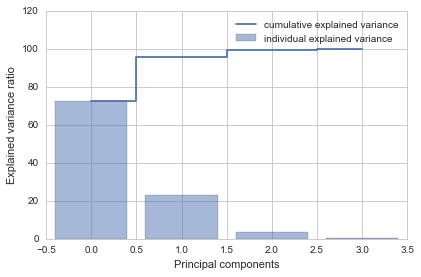

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), varianceExplained, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cumulativeVarianceexplained, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Projection Matrix

Create the projection Matrix - Note: when calling "reshape," the x length "4" corresponds to the length of the data attributes

In [25]:
Pmatrix = np.hstack((eigenPairs[0][1].reshape(4,1), eigenPairs[1][1].reshape(4,1)))

Calculate the dot product for the projection

In [26]:
Pmatrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [27]:
Y = xStandardized.dot(Pmatrix)

In [28]:
Y

,0,1
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767
5,-2.070537,-1.518549
6,-2.445711,-0.074563
7,-2.233842,-0.247614
8,-2.341958,1.095146
9,-2.188676,0.448629


## Scitkit Alternative

In [29]:
pca = PCA(n_components=2)
pca.fit_transform(xStandardized)

array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -

In [31]:
pcaFeatureCorr = pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2'])

In [32]:
pcaFeatureCorr

,SepalLength,SepalWidth,PetalLength,PetalWidth
PC-1,0.522372,-0.263355,0.581254,0.565611
PC-2,-0.372318,-0.925556,-0.021095,-0.065416
